# 문제 01 유형(DataSet_01.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data1=pd.read_csv('../Dataset/Dataset_01.csv')

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
data1.head()

TV      Radio  Social_Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181

- 회귀분석으로 효과적인 마케팅 채널 찾기
    - 패키지 선정: scikit-learn(sklearn), statsmodels
    - 패키지별 특징이 존재함
        - sklearn: numpy 채택(결측치 없어야 됨, 입력은 2D 수치형으로 픽스)
        - statsmodels: Series, DataFrame 채택(자동적으로 결측치 제외, 입력에 문자열 들어가도 가능, 자동적으로 더미로 변경)

In [ ]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

In [9]:
# isna와 isnull의 차이를 설명함
# 데이터프레임의 한 cell에는 여러 데이터타입이 들어갈 수 있는데
# 여러 값을 넣을 수 있는 데이터타입 또한 들어갈 수 있다.
# 이런 경우 여러 값 중 결측값이 존재할 때, 이 결측값은 na가 아닌 null로 인식된다.
# 이런 경우 isna에서는 결측값으로 인식하지 못하고
# isnull에서는 결측값으로 인식한다.
# data1의 데이터는 isna와 isnull을 구별하여 사용할 필요는 없는 데이터이다.
data1.isna().sum().sum()

26

In [10]:
data1.isna().sum(axis=1).value_counts()
# 전체 행 대비 null값이 존재하는 행의 수가 많으면 이를 보정시 데이터에 많은 왜곡이
# 발생하므로 이런 경우에는 결측치를 삭제한다.

0    4546
1      26
dtype: int64

In [12]:
data1.TV.isna().values

array([False, False, False, ..., False, False, False])

In [13]:
data1[data1.TV.isna()]

TV      Radio  Social_Media Influencer       Sales
13  NaN  22.351667      3.031815       Mega  276.165351
26  NaN  34.111674      4.624148       Nano  342.913372
46  NaN  34.859637      7.781417       Mega  318.969784
75  NaN   6.482293      0.866845      Macro   91.177216
99  NaN   7.635819      1.554146      Macro   56.186730
119 NaN  30.470485      6.806919      Micro  336.818690
141 NaN   9.164464      1.096681      Macro   65.259189
163 NaN  38.118424      6.676611      Micro  328.555184
183 NaN   1.287060      0.396179      Macro   56.545293
210 NaN  17.007075      5.199635      Macro  208.816382

In [15]:
na_idx=np.where(data1.TV.isna())
na_idx

(array([ 13,  26,  46,  75,  99, 119, 141, 163, 183, 210], dtype=int64),)

In [18]:
na_idx[0]

array([ 13,  26,  46,  75,  99, 119, 141, 163, 183, 210], dtype=int64)

In [ ]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

In [ ]:
# !pip install seaborn

In [19]:
import seaborn as sns

In [21]:
%matplotlib inline

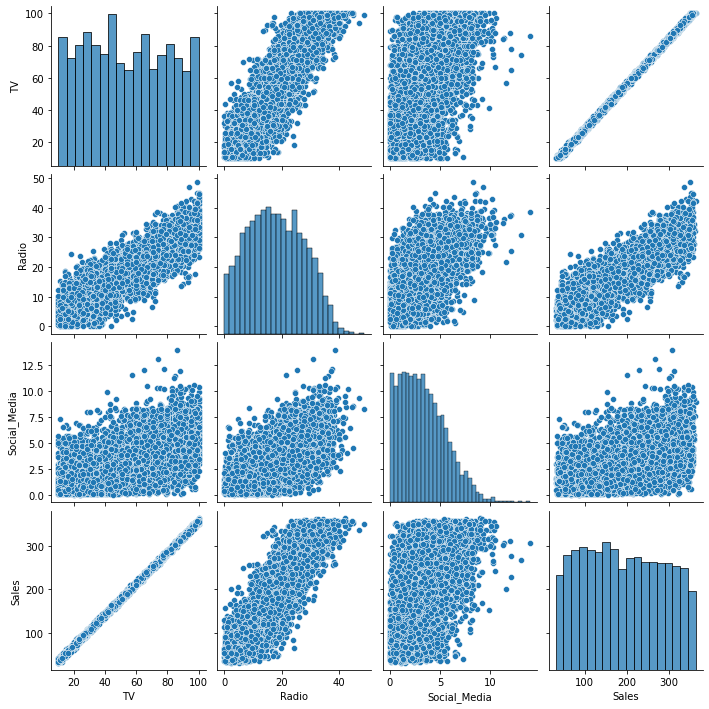

In [22]:
sns.pairplot(data1)

In [26]:
? data1.corr

In [23]:
q1=data1.corr()

In [24]:
q1

TV     Radio  Social_Media     Sales
TV            1.000000  0.869460      0.528168  0.999497
Radio         0.869460  1.000000      0.607452  0.869105
Social_Media  0.528168  0.607452      1.000000  0.528906
Sales         0.999497  0.869105      0.528906  1.000000

In [27]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

<AxesSubplot:>

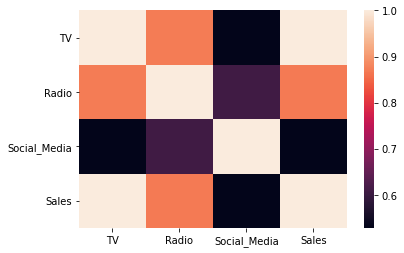

In [25]:
sns.heatmap(q1)

### Q2 답

In [33]:
np.round(q1['Sales'].drop('Sales').abs().max(), 4)

0.9995

In [31]:
q2=q1['Sales'].drop('Sales').abs()

In [ ]:
q2.max()  # 최대값 리턴

In [32]:
q2.argmax() # 최대값이 있는 위치번호 리턴

0

In [ ]:
q2.idxmax()  # 최대값이 있는 인덱스명 리턴

In [ ]:
q2.nlargest(2) # 상위 K 개의 값과 인덱스명 리턴

In [ ]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [36]:
x_list=['TV', 'Radio', 'Social_Media']

In [40]:
data1['TV'].ndim

1

In [41]:
data1['TV'].values.reshape(-1,1).ndim

2

In [44]:
data1[['TV']].ndim

2

In [46]:
data1['TV'].values.sum()

nan

In [47]:
q3=data1.dropna()

In [48]:
lm1=LinearRegression(fit_intercept=True)
lm1.fit(q3[['TV']], q3['Sales'])

In [50]:
dir(lm1)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [51]:
lm1.intercept_

-0.1324925400027439

In [52]:
lm1.coef_

array([3.56151409])

In [53]:
lm2=LinearRegression().fit(q3[x_list], q3['Sales'])

In [54]:
lm2.intercept_

-0.13396305194211777

In [55]:
lm2.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

- np.round()  # 소수점 이하 자리 지정 가능
- np.trunc( * 100) / 100 # 리턴 결과가 정수형으로 리턴
- np.ceil() # 리턴 결과가 정수형으로 리턴
- np.floor() # 리턴 결과가 정수형으로 리턴

In [58]:
q3_out=pd.Series(np.trunc(lm2.coef_ * 1000) / 1000, index=x_list)
q3_out

TV              3.562
Radio          -0.003
Social_Media    0.004
dtype: float64

In [59]:
q3_out.sort_values(ascending=False)

TV              3.562
Social_Media    0.004
Radio          -0.003
dtype: float64

In [60]:
# ols: R 방식과 동일, formula 안에 상수항 포함 여부 -1(미포함)
from statsmodels.formula.api import ols 

# OLS: sklearn 방식과 동일, 상수항 미포함
from statsmodels.api import OLS, add_constant   

In [ ]:
# a1=ols('식', dataset)   식: 'y~x1+x2+x3-1'  -1(상수항 미포함), C(x2), Social_Media
# a2=a1.fit()

# a2=ols('식', dataset).fit()

In [61]:
lm3=ols('Sales~TV+Radio+Social_Media', data1).fit() 

In [62]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [63]:
lm4=ols('Sales~TV+Radio+Social_Media+Influencer', data1).fit() 

In [65]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:14:03   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
np.mean([1,3,5,1,3,5,1,3,5,1,3,5,1,3,5,1,3,5, 1000])

55.473684210526315

In [68]:
data1.Influencer.unique() 

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [72]:
lm3.params   # 상수와 회귀계수

Intercept      -0.133963
TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [74]:
lm3.pvalues.index[lm3.pvalues < 0.05]  # 유의미한 입력 변수 선택

Index(['TV'], dtype='object')

In [75]:
lm3.fittedvalues  # 학습 데이터의 예측값

0        56.855516
1        46.154726
2       145.882779
3       295.474487
4        53.278061
           ...    
4567     92.478650
4568    252.759140
4569    156.565784
4570    252.748496
4571    149.455619
Length: 4546, dtype: float64

In [ ]:
lm3.resid  # 잔차

In [76]:
len(data1), len(lm3.resid)

(4572, 4546)

In [77]:
import matplotlib.pyplot as plt

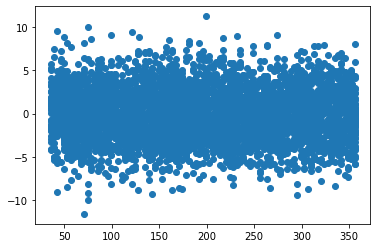

In [78]:
plt.scatter(x=lm3.fittedvalues, y=lm3.resid)

In [80]:
'+'.join(x_list)

'TV+Radio+Social_Media'

In [81]:
form1='Sales~'  + '+'.join(x_list)

'Sales~TV+Radio+Social_Media'

In [83]:
outlier1=lm3.outlier_test()
outlier1

student_resid   unadj_p  bonf(p)
0         -0.719867  0.471644      1.0
1          0.177422  0.859185      1.0
2          1.456438  0.145341      1.0
3          0.940040  0.347247      1.0
4          1.124662  0.260792      1.0
...             ...       ...      ...
4567       0.748484  0.454207      1.0
4568      -1.240494  0.214857      1.0
4569       2.397313  0.016556      1.0
4570       0.292277  0.770088      1.0
4571      -0.424926  0.670911      1.0

[4546 rows x 3 columns]

In [85]:
# q3[outlier1['bonf(p)'] < 0.05]  # 이상치 데이터 필터링

q3[outlier1['bonf(p)'] >= 0.05]  # 이상치 제외한 데이터 필터링

Empty DataFrame
Columns: [TV, Radio, Social_Media, Influencer, Sales]
Index: []

### 더미 변수 결과

In [66]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:14:12   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.275e+04
Df Residuals:                    4539   BIC:                         2.279e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1033      0.130     -0.797      0.426      -0.358       0.151
Influencer[T.Mega]      0.0116      0.124      0.094      0.926      -0.232       0.255
Influencer[T.Micro]    -0.0569      0.124     -0.458      0.647      -0.300       0.187
Influencer[T.Nano]     -0.0739      0.125     -0.593      0.553      -0.318       0.170
TV                      3.5626      0.003   1050.472      0.000       3.556       3.569
Radio                  -0.0039      0.010     -0.399      0.690      -0.023       0.015
Social_Media            0.0045      0.025      0.179      0.858      -0.044       0.053
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.043
Skew:                          -0.001   Prob(JB):                        0.979
Kurtosis:                       3.015   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 문제 02 유형(DataSet_02.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [93]:
data2 = pd.read_csv('ProDS특강/Dataset/Dataset_02.csv')

In [94]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [95]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [96]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [97]:
q2_1 = data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)
q2_1

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
Name: proportion, dtype: float64

In [98]:
q2_1.index

MultiIndex([('F',   'HIGH', 'NORMAL'),
            ('M',   'HIGH', 'NORMAL'),
            ('M',    'LOW', 'NORMAL'),
            ('M', 'NORMAL',   'HIGH'),
            ('F', 'NORMAL',   'HIGH'),
            ('M',   'HIGH',   'HIGH'),
            ('F',   'HIGH',   'HIGH'),
            ('M',    'LOW',   'HIGH'),
            ('F',    'LOW',   'HIGH'),
            ('F',    'LOW', 'NORMAL'),
            ('F', 'NORMAL', 'NORMAL'),
            ('M', 'NORMAL', 'NORMAL')],
           names=['Sex', 'BP', 'Cholesterol'])

In [99]:
q2_1[('F',   'HIGH', 'NORMAL')]

0.105

In [100]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================


In [101]:
# 카이스퀘어 검정: 두 범주형 변수에 대한 독립성/동질성 검정 수행 가능
# 적합성(단일변수), 독립성(두개 변수), 동질성(두개 변수)

In [133]:
# 1. 변수 변환
q2_2 = data2.copy()

# q2_2['Age_gr']=np.where(q2_2['Age'] < 20, 10, 
#                        np.where(q2_2['Age'] < 30, 20, 
#                                np.where(q2_2['Age'] < 40, 30, 
#                                        np.where(q2_2['Age'] < 50, 60, 
#                                                np.where(q2_2['Age'] < 60, 50, 60)
# np.where(조건, 조건이 True인 값에 넣을 값, 조건이 False인 값에 넣을 값)
                                                
# 결측값에 주의해야 함
# 결측치까지 고려한 코드
q2_2['Age_gr']=np.where(q2_2['Age'].isnull(), np.nan, 
                        np.where(q2_2['Age'] < 20, 10, 
                           np.where(q2_2['Age'] < 30, 20, 
                                   np.where(q2_2['Age'] < 40, 30, 
                                           np.where(q2_2['Age'] < 50, 40, 
                                                   np.where(q2_2['Age'] < 60, 50, 60))))))

In [134]:
q2_2['Na_K_gr'] = np.where(q2_2['Na_to_K'] <= 10, 'Lv1',
                          np.where(q2_2['Na_to_K'] <= 20, 'Lv2',
                                  np.where(q2_2['Na_to_K'] <= 30, 'Lv3', 'Lv4')))

In [135]:
# 2. 카이스퀘어 검정
# - 빈도표 작성
# - 빈도표를 입력으로 카이스퀘어 검정을 수행

# Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정

tab = pd.crosstab(index=q2_2['Sex'], columns=q2_2['Drug'])
tab

Drug  DrugY  drugA  drugB  drugC  drugX
Sex                                    
F        47      9      6      7     27
M        44     14     10      9     27

In [136]:
from scipy.stats import chi2_contingency # 카이스퀘어 검정

In [137]:
? chi2_contingency

In [138]:
chi_out = chi2_contingency(tab)
chi_out

Chi2ContingencyResult(statistic=2.119248418109203, pvalue=0.7138369773987128, dof=4, expected_freq=array([[43.68, 11.04,  7.68,  7.68, 25.92],
       [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [139]:
# H0: 두 범주형 변수가 독립이다.
# H1: 두 범주형 변수가 독립이 아니다. (상관이 있다.)

chi_out[1]
# 강사님 화면에서 chi_out의 출력은 튜플이었음
# 그래서 인덱스를 사용한 것임
# 위 출력은 그렇지 않은데 똑같이 적용되네
# 버전이 다르다고 함

0.7138369773987128

In [140]:
chi_out[1] < 0.05

False

In [141]:
# 3. 반복적으로 카이스퀘어 검정 수행
q2_2_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

In [142]:
q2_2_out = []

for i in q2_2_list:
    tab = pd.crosstab(index=q2_2[i], columns=q2_2['Drug'])
    chi_out = chi2_contingency(tab)
    q2_2_out.append([i, chi_out[0], chi_out[1]])

In [143]:
q2_2_out = pd.DataFrame(q2_2_out, columns=['var','chi','pvalue'])
q2_2_out

var         chi        pvalue
0          Sex    2.119248  7.138370e-01
1           BP  143.232872  5.041733e-27
2  Cholesterol   19.609658  5.962588e-04
3       Age_gr   46.440652  7.010113e-04
4      Na_K_gr   93.310063  1.125464e-14

In [144]:
q2_2_out2 = q2_2_out[q2_2_out.pvalue < 0.05]
np.trunc(q2_2_out2.pvalue.max() * 100000) / 100000

0.0007

In [ ]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

In [ ]:
# 훈련 데이터에는 없던 범주가 테스트 데이터에서 나온경우
# 훈련 데이터를 수치화 시킬 때 '기타'를 나타내는 수치를 넣어서
# 테스트 데이터에서 새로 나온 범주들을 모두 '기타'로 처리한다.

In [114]:
# (1) 변수 생성
q2_3 = data2.copy()

In [116]:
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
q2_3['Sex_cd']=np.where(q2_3['Sex'] == 'M', 0, 1)

# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
q2_3['BP_cd']=np.where(q2_3['BP'] == 'LOW', 0, 
                      np.where(q2_3['BP'] == 'NORMAL', 1, 2))

# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
q2_3['Ch_cd']=np.where(q2_3['Cholesterol'] == 'NORMAL', 0, 1)

In [126]:
# (2) 의사결정나무 분류 수행

q2_3_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [118]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [127]:
dt = DecisionTreeClassifier().fit(q2_3[q2_3_list], q2_3['Drug'])

In [120]:
%matplotlib inline

In [122]:
import matplotlib.pyplot as plt

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(0.5555555555555556, 0.7, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugX'),
 Text(0.3333333333333333, 0.5, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugX'),
 Text(0.2222222222222222, 0.3, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugX'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugX'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugC'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugX'),
 Text(0.7777777777777778, 0.5, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugA'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drug

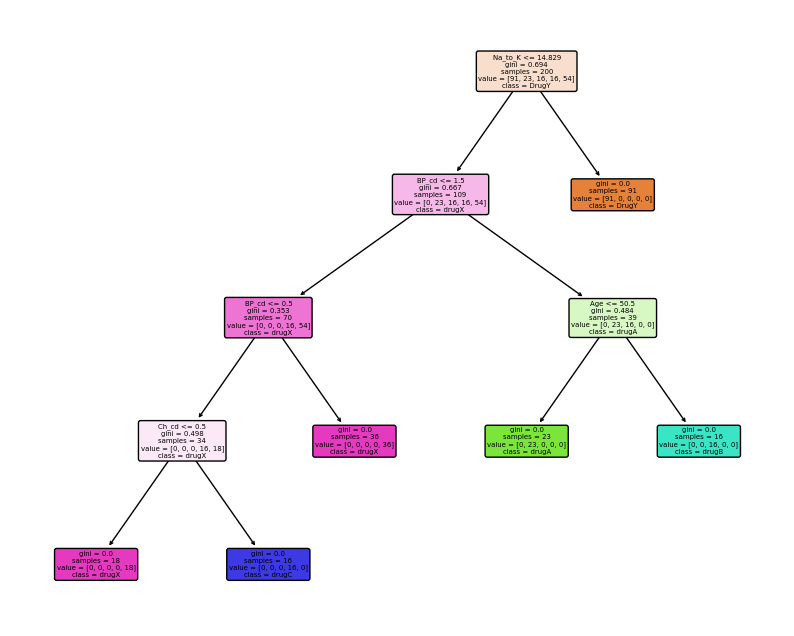

In [132]:
# (3) 룰을 시각화 또는 텍스트로 송출해서 특징을 찾기
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=q2_3_list, class_names=list(dt.classes_), fontsize=5, 
         rounded=True, filled=True)

In [148]:
print(export_text(dt, feature_names=q2_3_list, decimals=3))

# 카이스퀘어 검정에서 성별은 p값이 0.05보다 컸다. 
# 이는 'Drug'와 성별이 독립인 것을 의미한다.
# 결정 트리 결과에서도 확인할 수 있다.
# 트리를 나누는 기준에 성별이 포함되지 않았다. (독립이기 때문이다.)

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



# 문제 03 유형(DataSet_03.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

In [149]:
data3 = pd.read_csv('ProDS특강/Dataset/Dataset_03.csv')

In [150]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [151]:
data3.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================


In [152]:
q3_1 = data3.copy()

In [153]:
q3_1['forehead_ratio'] = q3_1.forehead_width_cm / q3_1.forehead_height_cm

In [154]:
q3_1.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  forehead_ratio  
0          1                          1    Male        1.934426  
1          1                          0  Female        2.592593  
2          1                          1    Male        1.873016  
3          1                          1    Male        2.360656  
4          0                          0  Female        2.288136

In [156]:
xbar = q3_1['forehead_ratio'].mean()
std_ratio = q3_1['forehead_ratio'].std()

In [158]:
LB = xbar - (3 * std_ratio)
UB = xbar + (3 * std_ratio)

In [160]:
q3_1_outlier = q3_1[(q3_1['forehead_ratio'] < LB) | (q3_1['forehead_ratio'] > UB)]
len(q3_1_outlier)

3

In [161]:
def outlier_test(x):
    Q1 = x.quantile(1/4)
    Q3 = x.quantile(3/4)
    IQR = Q3 - Q1
    
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)
    
    outlier = (x < LB) | (x > UB)
    
    return outlier

In [163]:
out1 = outlier_test(q3_1['forehead_ratio'])
out1

0       False
1       False
2       False
3       False
4       False
        ...  
4996    False
4997    False
4998    False
4999    False
5000    False
Name: forehead_ratio, Length: 5001, dtype: bool

In [164]:
q3_1[out1]

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
56            1               15.4                 5.1          1          1   
207           1               15.1                 5.1          1          1   
244           1               15.4                 5.1          1          0   
1110          1               15.4                 5.2          1          1   
1156          1               15.4                 5.2          1          1   
1255          1               15.2                 5.1          0          1   
1408          1               15.2                 5.1          1          1   
1562          1               15.4                 5.1          1          1   
1640          0               15.5                 5.2          0          0   
1641          1               15.5                 5.1          1          1   
1713          1               15.2                 5.1          1          1   
1817          1               15.5                 5.1          1          0   
2205          0               15.2                 5.1          1          1   
3094          1               15.4                 5.2          1          1   
3213          1               15.5                 5.2          0          1   
3414          1               15.1                 5.1          0          1   
3939          1               15.3                 5.1          1          1   
4115          1               15.2                 5.1          1          0   
4309          1               15.4                 5.2          1          1   
4382          0               15.3                 5.1          1          1   
4514          1               15.5                 5.2          1          1   
4526          1               15.4                 5.2          1          1   
4827          1               15.2                 5.1          0          1   
4948          0               15.5                 5.1          1          1   
4979          1               15.4                 5.1          0          1   

      lips_thin  distance_nose_to_lip_long gender  forehead_ratio  
56            1                          0   Male        3.019608  
207           1                          1   Male        2.960784  
244           1                          1   Male        3.019608  
1110          1                          0   Male        2.961538  
1156          1                          1   Male        2.961538  
1255          1                          1   Male        2.980392  
1408          1                          1   Male        2.980392  
1562          1                          1   Male        3.019608  
1640          0                          1   Male        2.980769  
1641          1                          1   Male        3.039216  
1713          1                          1   Male        2.980392  
1817          1                          1   Male        3.039216  
2205          1                          1   Male        2.980392  
3094          1                          1   Male        2.961538  
3213          1                          1   Male        2.980769  
3414          1                          0   Male        2.960784  
3939          1                          1   Male        3.000000  
4115          1                          1   Male        2.980392  
4309          1                          1   Male        2.961538  
4382          0                          1   Male        3.000000  
4514          1                          1   Male        2.980769  
4526          1                          1   Male        2.961538  
4827          1                          1   Male        2.980392  
4948          1                          1   Male        3.039216  
4979          1                          1   Male        3.019608

In [ ]:
# 그룹간 이질적인 특징을 갖는 데이터의 경우
# 데이터 전체를 사용해서 이상값을 찾는 것이 적합하지 않다.
# 이런 경우 그룹단위로 이상값을 찾는 것이 적절하다.
# 위 데이터의 경우 이상값의 성별은 모두 남성이다.
# 그룹간 이질적인 특징을 갖는 경우에 해당한다.

In [174]:
out2 = q3_1.groupby('gender')['forehead_ratio'].apply(outlier_test)
out2
# q3_1[out2]

gender      
Female  1       False
        4       False
        7       False
        8       False
        9       False
                ...  
Male    4987    False
        4992    False
        4994    False
        4995    False
        5000    False
Name: forehead_ratio, Length: 5001, dtype: bool

In [166]:
import seaborn as sns

<Axes: xlabel='gender', ylabel='forehead_ratio'>

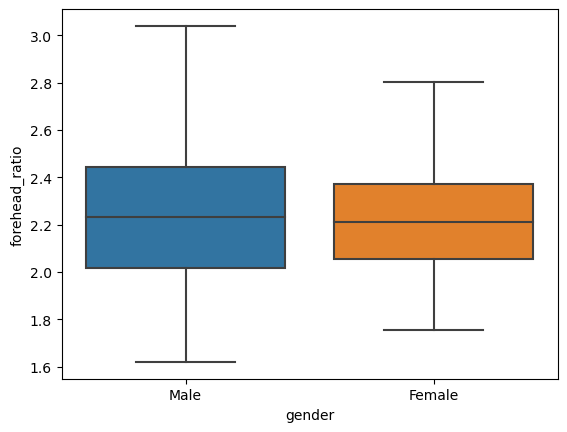

In [167]:
sns.boxplot(data=q3_1, x='gender', y='forehead_ratio')

<Axes: ylabel='forehead_ratio'>

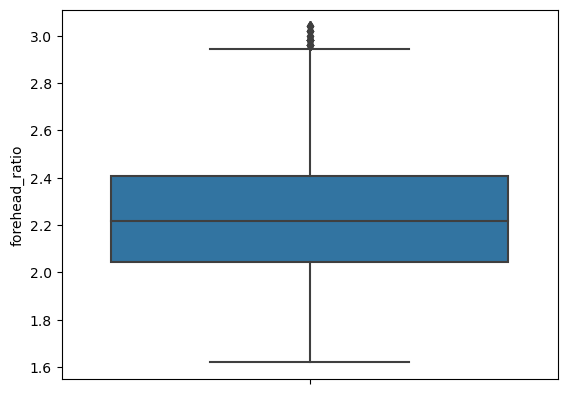

In [168]:
sns.boxplot(data=q3_1, y='forehead_ratio')

In [175]:
from sklearn.neighbors import LocalOutlierFactor
# https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor
# 거리를 사용한다. -> 표준화가 되어있어야 한다.

from sklearn.datasets import load_iris

In [176]:
?load_iris

In [180]:
# iris = load_iris(as_frame=True)
X, Y = load_iris(return_X_y=True, as_frame=True)

In [181]:
# iris.data
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [182]:
# iris.target
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [183]:
# LocalOutlierFactor 기법
?LocalOutlierFactor

In [184]:
lof = LocalOutlierFactor(novelty=True).fit(X)

In [185]:
lof.offset_ # = -2

-1.5

In [186]:
lof.negative_outlier_factor_

array([-0.97441839, -1.01339844, -1.02439063, -1.05593645, -0.95923775,
       -1.15241648, -1.02028254, -0.96486836, -1.19431941, -0.96590417,
       -1.03930799, -0.96287672, -1.02987361, -1.32568723, -1.48020323,
       -1.67187225, -1.15306178, -0.97536351, -1.24180918, -1.00311027,
       -1.02534917, -1.0023451 , -1.27368435, -0.99320982, -1.07242318,
       -0.98488988, -0.97517153, -0.97921234, -0.97506634, -1.01723168,
       -0.99950206, -0.99491375, -1.21162996, -1.36588204, -0.9700006 ,
       -0.97752859, -1.07916688, -0.94531486, -1.16500566, -0.97714549,
       -0.95284631, -1.77758216, -1.13515903, -1.01241984, -1.13644094,
       -1.02786816, -1.00537484, -1.04856947, -1.02026449, -0.96826491,
       -1.20282755, -0.99761028, -1.07844066, -1.03364654, -0.9953524 ,
       -0.95063526, -0.97716288, -1.43289078, -1.01426701, -1.03276093,
       -1.39579148, -0.95668852, -1.07447228, -0.96654775, -1.03021185,
       -1.07568011, -0.99430327, -0.99381967, -1.13474606, -1.00

In [187]:
lof_outlier = lof.predict(X)
lof_outlier # 1: 정상, -1: 이상치

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [188]:
# offset을 바꿔보자
lof.offset_ = -2

In [189]:
lof.negative_outlier_factor_

array([-0.97441839, -1.01339844, -1.02439063, -1.05593645, -0.95923775,
       -1.15241648, -1.02028254, -0.96486836, -1.19431941, -0.96590417,
       -1.03930799, -0.96287672, -1.02987361, -1.32568723, -1.48020323,
       -1.67187225, -1.15306178, -0.97536351, -1.24180918, -1.00311027,
       -1.02534917, -1.0023451 , -1.27368435, -0.99320982, -1.07242318,
       -0.98488988, -0.97517153, -0.97921234, -0.97506634, -1.01723168,
       -0.99950206, -0.99491375, -1.21162996, -1.36588204, -0.9700006 ,
       -0.97752859, -1.07916688, -0.94531486, -1.16500566, -0.97714549,
       -0.95284631, -1.77758216, -1.13515903, -1.01241984, -1.13644094,
       -1.02786816, -1.00537484, -1.04856947, -1.02026449, -0.96826491,
       -1.20282755, -0.99761028, -1.07844066, -1.03364654, -0.9953524 ,
       -0.95063526, -0.97716288, -1.43289078, -1.01426701, -1.03276093,
       -1.39579148, -0.95668852, -1.07447228, -0.96654775, -1.03021185,
       -1.07568011, -0.99430327, -0.99381967, -1.13474606, -1.00

In [190]:
lof_outlier = lof.predict(X)
lof_outlier # 1: 정상, -1: 이상치

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [ ]:
# 일표본 t 가설 검정
# mu == 0, mu >= 0, mu <= 0
# mu != 0, mu < 0,  mu > 0

# 이표본 t 가설 검정
# H0: muA == muB, muA >= muB, muA <= muB, muA - muB == 0
# H1: muA != muB, muA < muB, muA > muB,  muA - muB != 0

# => 독립: 측정 도구 동일. 그룹내에서는 동일 대상(제품) 반복 측정.
#          그룹 간에는 동급 제품들을 대상으로 해야 함
# => 대응: 

In [ ]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

 # 문제 04 유형(DataSet_04.csv 이용)

In [ ]:
# =============================================================================
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# from scipy.stats import ttest_rel
# #3
# from sklearn.linear_model import LinearRegression

In [ ]:
# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다. 
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
# (답안 예시) 0.55
# =============================================================================

In [ ]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
# 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

In [ ]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
# 
# =============================================================================

In [ ]:

# =============================================================================
# # 문제 05 유형(DataSet_05.csv 이용)
#

# 구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩
#
# A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 
# 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
# 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 
# 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.
#

# 컬 럼 / 정 의 / Type
# ID / 고유 식별자 / Double
# Age / 나이 / Double
# Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
# Gender / 성별 (여성 : 0 / 남성 : 1) / Double
# Work_Experience / 취업 연수 (0 ~ 14) / Double
# Family_Size / 가족 규모 (1 ~ 9) / Double
# Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
# Graduated / 재학 중인지 여부 / Double
# Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
# Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
# Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
# Segmentation / 고객 세분화 결과 (A ~ D) / String
# =============================================================================
# =============================================================================


#(참고)
#1
# import pandas as pd
# #2
# from scipy.stats import chi2_contingency
# #3
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# import pydot


#%%

# =============================================================================
# 1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
# 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
# 모두 더하여 답하시오.
# (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123
# =============================================================================






#%%

# =============================================================================
# 2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
# 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
# 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. 
# (답안 예시) 0.2345, N
# =============================================================================





#%%

# =============================================================================
# 3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
# 정확도를
# 측정해 본다. 
# - 결측치가 포함된 행은 제거한 후 진행하시오.
# - Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
# - Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
# 수행한다.
# - 의사결정나무 학습 시, 다음과 같이 설정하시오:
# • Feature: Age_gr, Gender, Work_Experience, Family_Size, 
#             Ever_Married, Graduated, Spending_Score
# • Label : Segmentation
# • Parameter : Gini / Max Depth = 7 / Seed = 123
# 이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
# 기술하시오.
# (답안 예시) 0.12
# =============================================================================